<a href="https://colab.research.google.com/github/novita824/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3.) Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 260 artists>

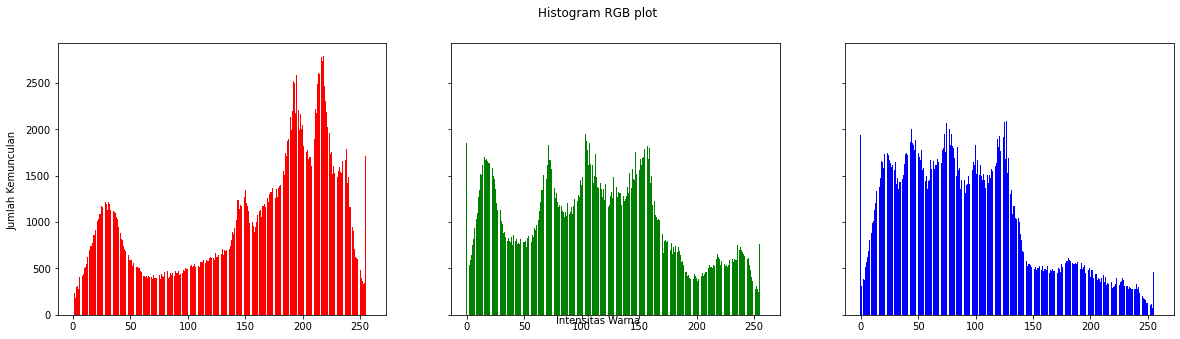

In [57]:
original = cv.imread('/content/drive/MyDrive/lena.jpg')
height, width, depth = np.shape(original)
angka = np.arange(260)

red = [0]*260
green = [0]*260
blue = [0]*260

for y in range(0,height):
  for x in range(0, width):
    blue[original[y][x][0]] += 1
    green[original[y][x][1]] += 1
    red[original[y][x][2]] += 1

angka = np.arange(260)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09,0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5,0.10, 'Intensitas Warna', ha='center')
axs[0].bar(angka, red, color='red')
axs[1].bar(angka, green, color='green')
axs[2].bar(angka, blue, color='blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

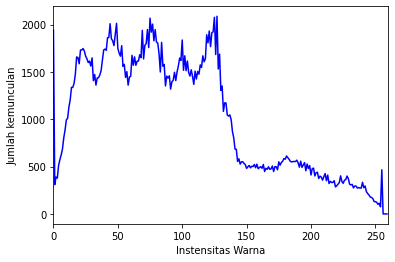

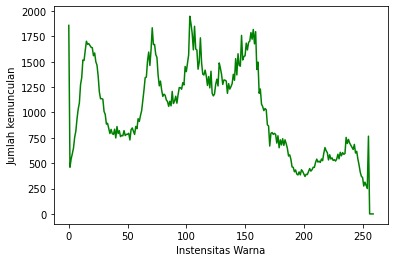

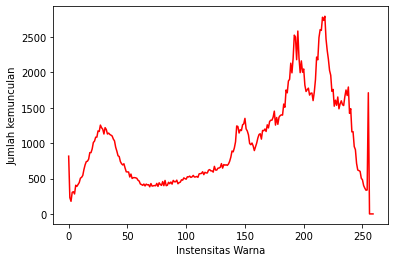

In [59]:
color = ('b',"g","r")
channel_ids = (0,1,2)

plt.xlim([0,260])
for channel_id, c in zip(channel_ids, color):
  histogram, bin_edges = np.histogram(
      original[:, :, channel_id], bins=260, range =(0,260)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Instensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

5.) Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

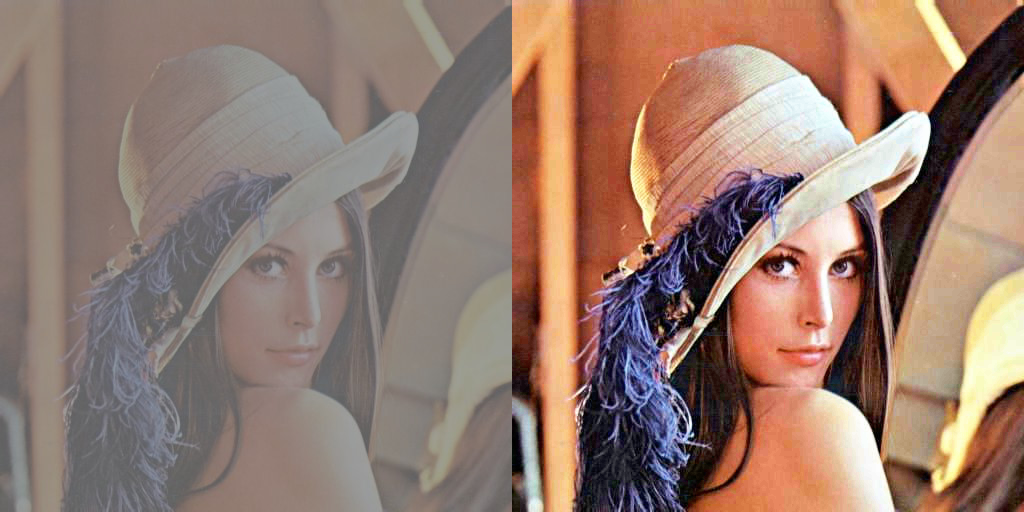

<BarContainer object of 260 artists>

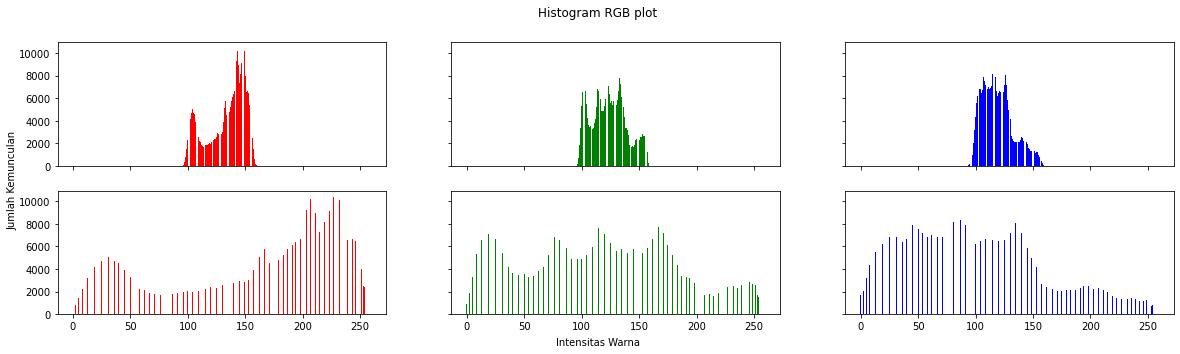

In [69]:
original = cv.imread('/content/drive/MyDrive/lena_lc.jpg')
height, width, depth = np.shape(original)
names = np.arange(260)

red = [0]*260
green = [0]*260
blue = [0]*260

def histog(original):
  height, width, depth = np.shape(original) 
  ax = np.zeros((3,260)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][original[y][x][0]] += 1 
      ax[1][original[y][x][1]] += 1
      ax[2][original[y][x][2]] += 1 
  return ax

histo_asli = histog(original)

img_array = np.asarray(original)


histogram_array = np.bincount(img_array.flatten(), minlength=260)

num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array)
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array
equal_histo = histog(img2)
final_frame = cv.hconcat((original, img2)) 
cv2_imshow(final_frame)

names = np.arange (260) 
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
fig.suptitle('Histogram RGB plot') 
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
axs[0,0].bar(names, histo_asli[2], color='red') 
axs[0,1].bar(names, histo_asli[1], color='green') 
axs[0,2].bar(names, histo_asli[0], color='blue') 
axs[1,0].bar(names, equal_histo[2], color='red') 
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')

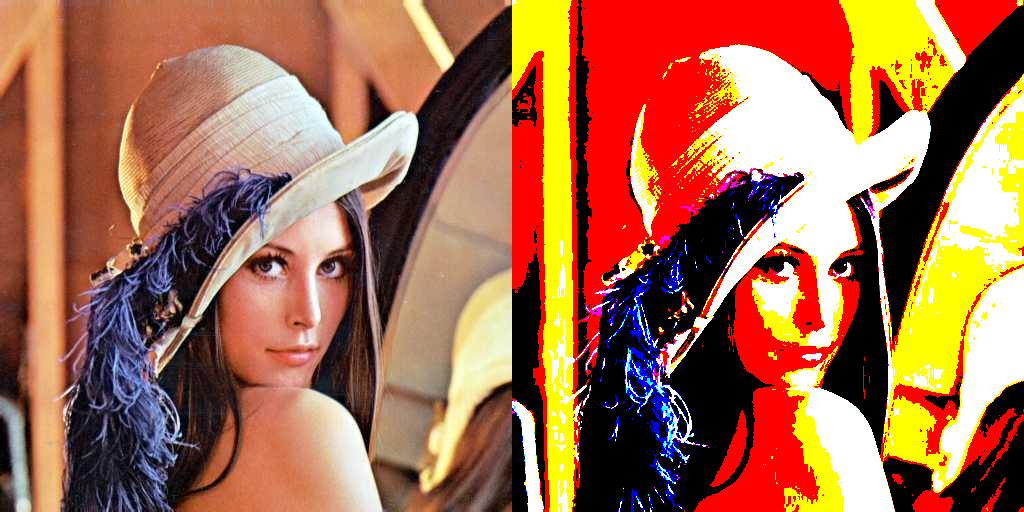

In [67]:
original = cv.imread('/content/drive/MyDrive/lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = cv.cvtColor(original, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for y in range(0, img_16jt.shape[0]):
  for x in range(0, img_16jt.shape[1]):
    baru = warnaTerdekat(img_16jt[y, x, 0], img_16jt[y, x, 1], img_16jt[y, x, 2])
    img_8[y, x] = warnaPallette[baru]
    
img_16jt = cv.cvtColor(img_16jt, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16jt, img_8))
cv2_imshow(final_frame)
     